In [40]:
from rossby_waves import *
from math import floor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, vel, vel_autocor
from matplotlib.animation import FuncAnimation, PillowWriter

We want to calculate velocity autocorrelation. Function for that is $\psi(t) =\frac{1}{N} \sum_{i=1} ^N \frac{v_i(t) \cdot v_i(0)}{v_i^2} $. 

In [41]:
#Our Rossby and Ocean used in all models
#ro is RossbyOcean of grid of Rossbywaves, should be periodic
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
x = grid(100)

Purely rotational flow (eps = 1)


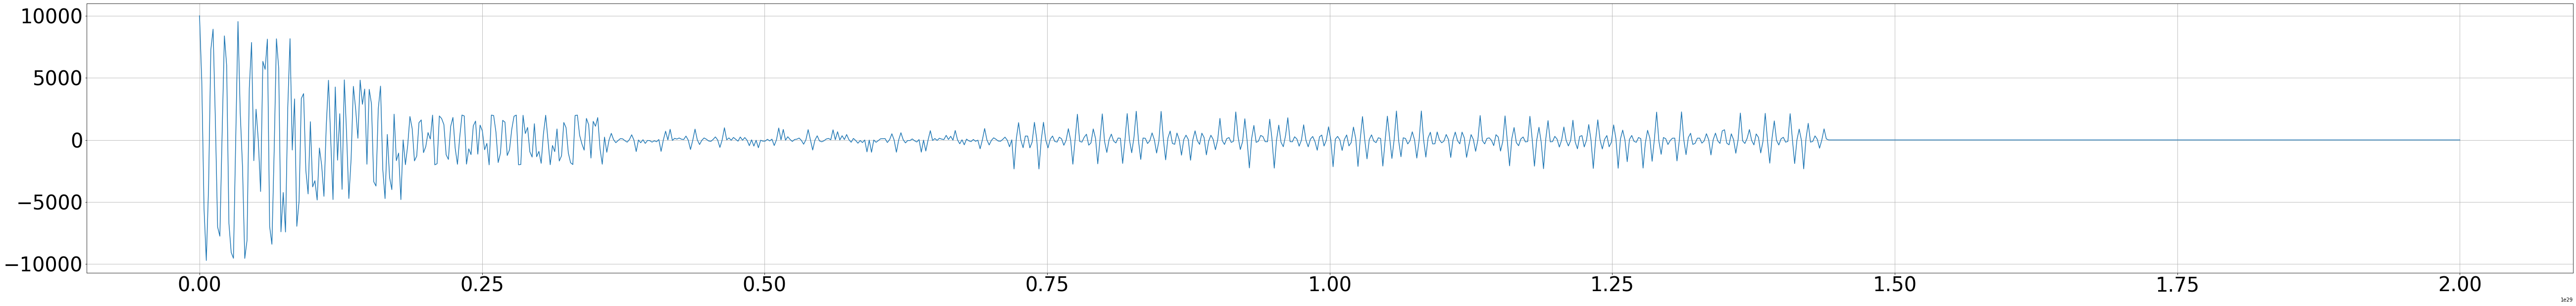

In [42]:
t = np.linspace(1, 2e29,1000)
arr = []
for i in t:
    arr.append(vel_autocor(ro, x, i, e=1))

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('vaf1.png')

Purely irrotational flow (eps = 0)

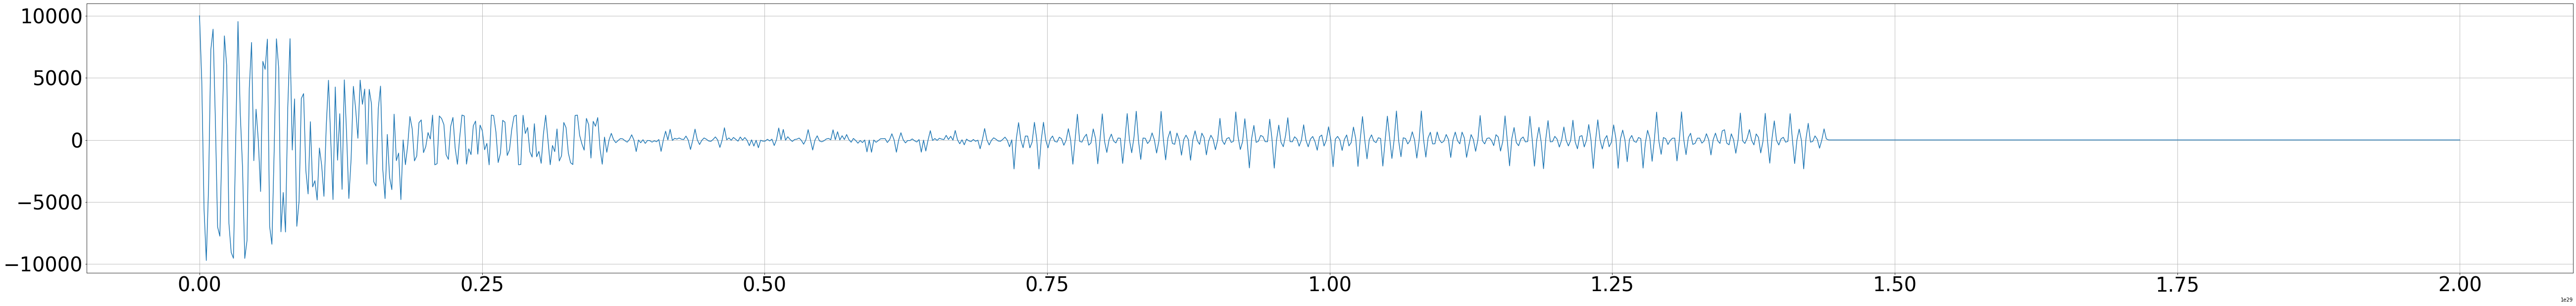

In [43]:
t = np.linspace(1, 2e29,1000)
arr = []
for i in t:
    arr.append(vel_autocor(ro, x, i, e=0))

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show
plt.savefig('vaf0.png')

weak Rotational flow (eps = 0.9)

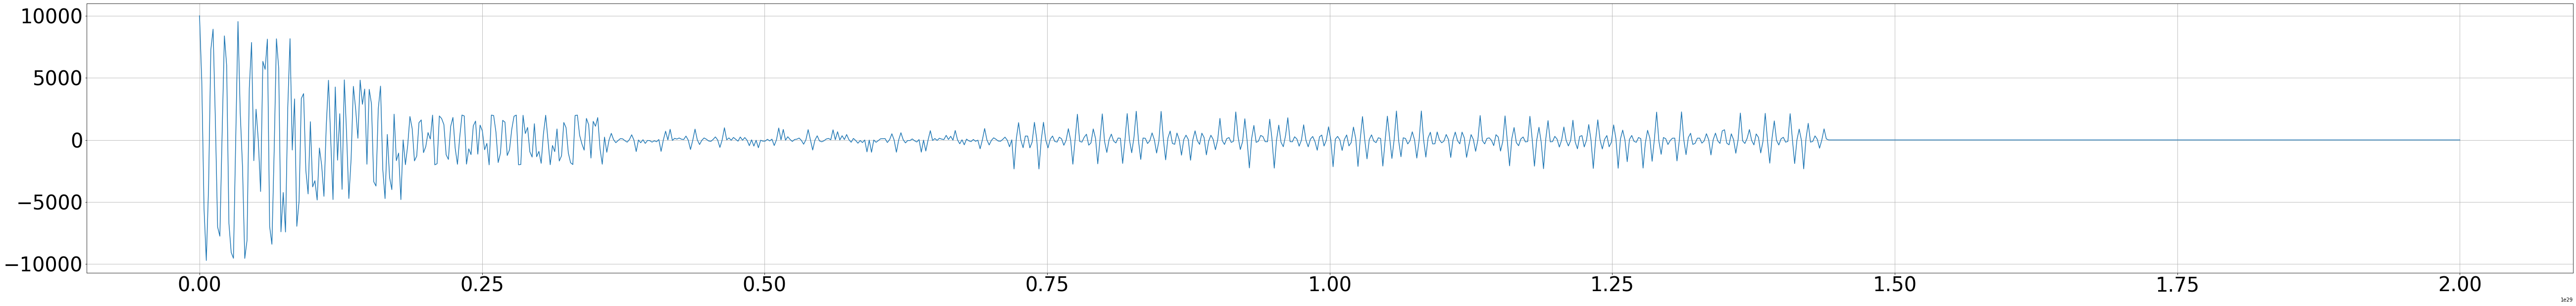

In [44]:
t = np.linspace(1, 2e29,1000)
arr = []
for i in t:
    arr.append(vel_autocor(ro, x, i, e=0.9))

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show

plt.savefig('vaf0.9.png')

Extremely Weak Rotational Flow (eps = 0.9999)

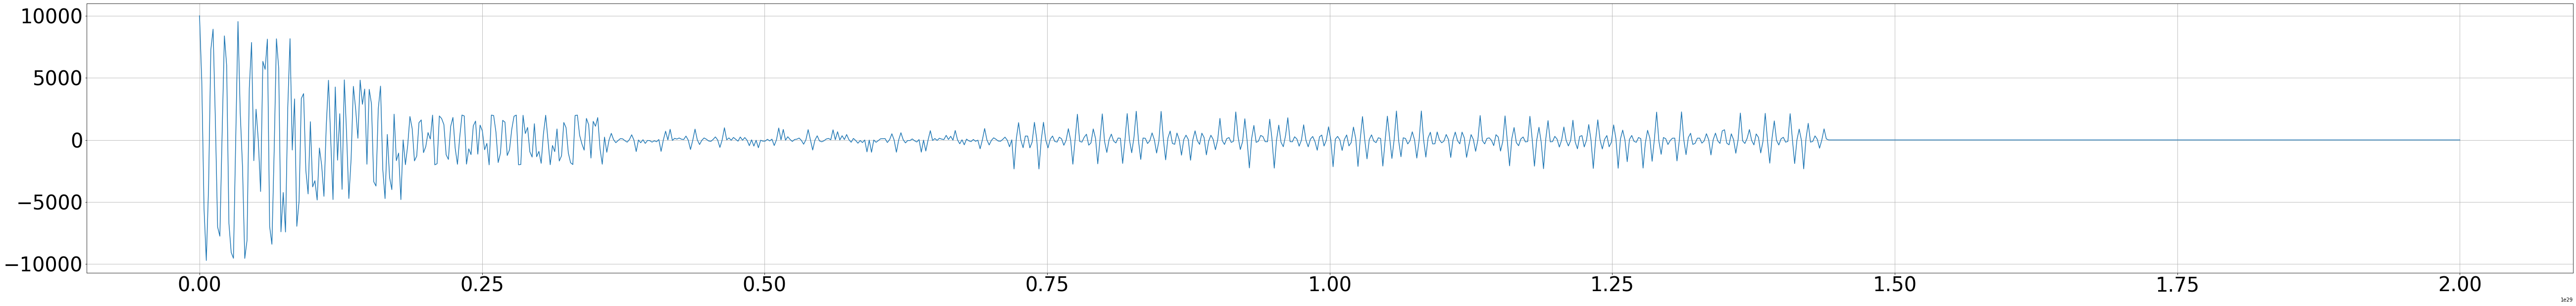

In [45]:
t = np.linspace(1, 2e29,1000)
arr = []
for i in t:
    arr.append(vel_autocor(ro, x, i, e=0.9999))

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(figsize=(90, 10))
ax = fig.add_subplot(111)
ax.plot(t,arr)
ax.grid(True, which='both')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
fig.show

plt.savefig('vaf0.9999.png')